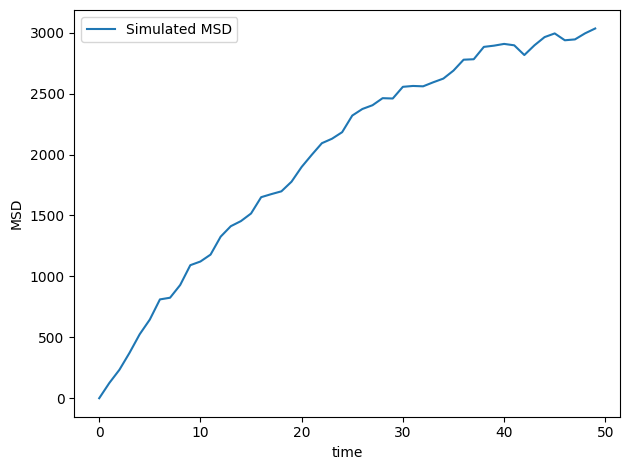

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import abp_sim

# -------------------
# Parameters
# -------------------
N = 500
radius = 1.0
v0 = 0.5
dt = 0.01
steps = 5000
phi = 0.5

L = np.sqrt(N * np.pi * radius**2 / phi)

positions = np.random.rand(N, 2) * L
thetas = 2 * np.pi * np.random.rand(N)

# Save initial positions for MSD
r0 = positions.copy()

system = abp_sim.System(N, L)
system.initialize_particles( positions.tolist(), thetas.tolist() ) 

particles = system.get_particles()

evolver = abp_sim.Evolver(system)

msd = np.zeros(steps // 100)
time_plot = np.arange(steps // 100) * (100 * dt)

k = 0
for t in range(steps):
    evolver.step()
    pos = np.array([p.position_unwrapped for p in particles])
    if t % 100 == 0:
        dr = pos - r0
        msd[k] = np.mean(np.sum(dr**2, axis=1))
        k += 1

# -------------------
# Plot MSD
# -------------------
plt.figure()
plt.plot(time_plot, msd, label="Simulated MSD")
plt.xlabel("time")
plt.ylabel("MSD")
plt.legend()
plt.tight_layout()
plt.show()
